In [7]:
import matplotlib.pyplot as plt #grafik
%matplotlib inline

from skimage import data #menggunakan modul data yang disediakan oleh pustaka skimage
from skimage.io import imread #untuk membaca gambar dari file ke dalam bentuk array NumPy
from skimage.color import rgb2gray #untuk mengimpor fungsi rgb2gray dari modul color dalam pustaka skimage (scikit-image)
import numpy as np #data dalam bentuk array
import cv2 #mengimpor gambar

Shape citra 1 :  (415, 236)
Shape citra 2 :  (431, 236)


Text(0.5, 1.0, 'Citra 2')

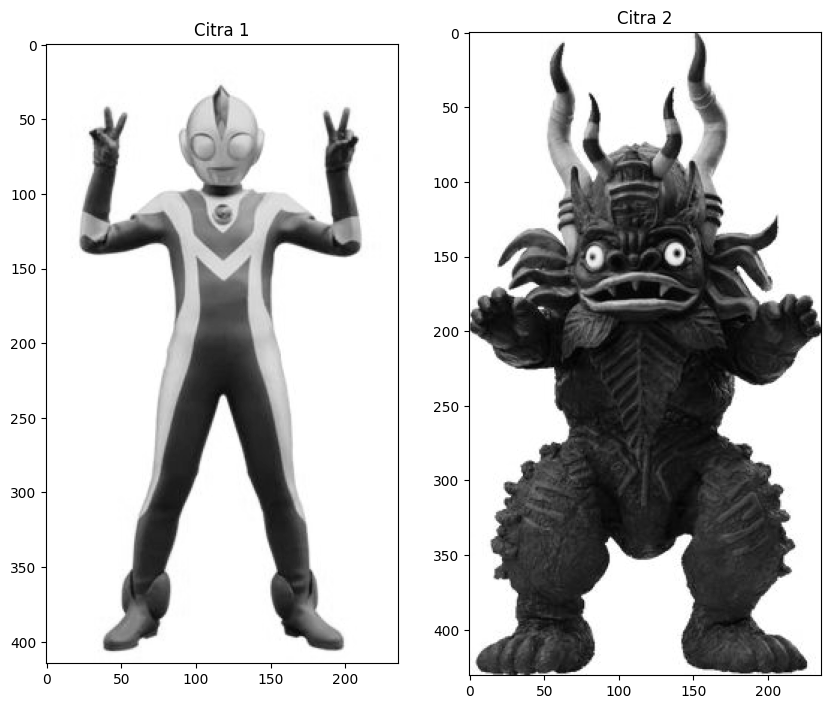

In [8]:
citra1 = imread(fname="pissss.jpg") #membaca gambar
citra1 = cv2.cvtColor(citra1,cv2.COLOR_RGB2GRAY) #untuk mengubah citra citra1 dari skala warna RGB menjadi skala abu-abu (grayscale) 
citra2 = imread(fname="musuh.jpg")
citra2 = cv2.cvtColor(citra2,cv2.COLOR_RGB2GRAY)

#untuk mencetak (menampilkan) informasi tentang dimensi (jumlah baris dan kolom) citra 
print('Shape citra 1 : ', citra1.shape) 
print('Shape citra 2 : ', citra2.shape)

fig, axes = plt.subplots(1, 2, figsize=(10, 10)) #untuk membuat objek gambar (figure) dan objek sumbu (axes) dalam bentuk grid dengan 1 baris dan 2 kolom, dengan ukuran (dimensi) gambar sebesar 10x10 inci.
ax = axes.ravel() #untuk meratakan (flatten) objek array

ax[0].imshow(citra1, cmap = 'gray') #Citra ditampilkan dalam skala abu-abu (grayscale) 
ax[0].set_title("Citra 1") # judul
ax[1].imshow(citra2, cmap = 'gray') #Citra ditampilkan dalam skala abu-abu (grayscale) 
ax[1].set_title("Citra 2") #judul

In [10]:
#proses filter rerata untuk citra mobil
#F2 = double(inputMobil);
#for baris=2 : tinggiA-1
#    for kolom=2 : lebarA-1
#        jum = F2(baris-1, kolom-1)+ F2(baris-1, kolom) + F2(baris-1, kolom-1) + ...
#              F2(baris, kolom-1) + F2(baris, kolom) + F2(baris, kolom+1) + ...
#              F2(baris+1, kolom-1) + F2(baris+1, kolom) + F2(baris+1, kolom+1);         
#         outputMobil(baris, kolom) = uint8(1/9 * jum);
#    end
#end

In [9]:
#untuk membuat salinan citra
copyCitra1 = citra1.copy().astype(float)
copyCitra2 = citra2.copy().astype(float)

m1,n1 = copyCitra1.shape #untuk mengambil dimensi (jumlah baris dan kolom) dari citra dan menyimpannya dalam variabel m1 dan n1
output1 = np.empty([m1, n1]) #untuk membuat array kosong dengan dimensi [m1, n1] menggunakan fungsi empty() dari modul NumPy

m2,n2 = copyCitra2.shape #untuk mengambil dimensi (jumlah baris dan kolom) dari citra
output2 = np.empty([m2, n2]) #untuk membuat array kosong dengan dimensi [m1, n1] menggunakan fungsi empty() dari modul NumPy
print('Shape copy citra 1 : ', copyCitra1.shape) #untuk mencetak (menampilkan) informasi tentang dimensi (jumlah baris dan kolom) dari citra salinan 
print('Shape output citra 1 : ', output1.shape)

# untuk mencetak (menampilkan) nilai dari variabel 
print('m1 : ',m1)
print('n1 : ',n1)
print()

print('Shape copy citra 2 : ', copyCitra2.shape) #untuk mencetak (menampilkan) informasi tentang dimensi (jumlah baris dan kolom) dari citra salinan
print('Shape output citra 3 : ', output2.shape)
# untuk mencetak (menampilkan) nilai dari variabel 
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (415, 236)
Shape output citra 1 :  (415, 236)
m1 :  415
n1 :  236

Shape copy citra 2 :  (431, 236)
Shape output citra 3 :  (431, 236)
m2 :  431
n2 :  236



In [10]:
for baris in range(0, m1-1): # untuk melakukan iterasi (perulangan) pada range nilai dari 0 hingga m1-1, di mana m1 adalah jumlah baris citra
    for kolom in range(0, n1-1): # untuk melakukan iterasi (perulangan) pada range nilai dari 0 hingga m1-1, di mana m1 adalah jumlah kolom citra
        a1 = baris
        b1 = kolom
        jumlah = copyCitra1[a1-1, b1-1] + copyCitra1[a1-1, b1] + copyCitra1[a1-1, b1-1] + \
                 copyCitra1[a1, b1-1] + copyCitra1[a1, b1] + copyCitra1[a1, b1+1] + \
                 copyCitra1[a1+1, b1-1] + copyCitra1[a1+1, b1] + copyCitra1[a1+1, b1+1];  
        output1[a1, b1] = (1/9 * jumlah)

In [11]:
for baris1 in range(0, m2-1): # untuk melakukan iterasi (perulangan) pada range nilai dari 0 hingga m1-1, di mana m1 adalah jumlah baris citra
    for kolom1 in range(0, n2-1):  #untuk melakukan iterasi (perulangan) pada range nilai dari 0 hingga m1-1, di mana m1 adalah jumlah kolom citra
        a1 = baris1
        b1 = kolom1
        jumlah = copyCitra2[a1-1, b1-1] + copyCitra2[a1-1, b1] + copyCitra2[a1-1, b1-1] + \
                 copyCitra2[a1, b1-1] + copyCitra2[a1, b1] + copyCitra2[a1, b1+1] + \
                 copyCitra2[a1+1, b1-1] + copyCitra2[a1+1, b1] + copyCitra2[a1+1, b1+1];  
        output2[a1, b1] = (1/9 * jumlah)

Text(0.5, 1.0, 'Output Citra 2')

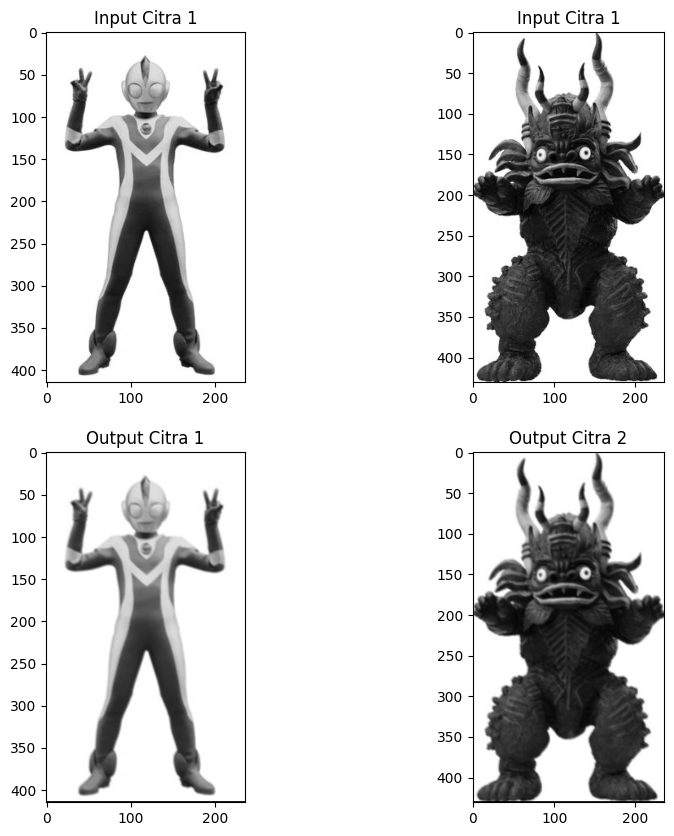

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) #n untuk membuat objek gambar (figure) dan objek sumbu (axes) dalam bentuk grid dengan 2 baris dan 2 kolom, dengan ukuran (dimensi) gambar sebesar 10x10 inci
ax = axes.ravel() #untuk meratakan (flatten) objek array 

ax[0].imshow(citra1, cmap = 'gray') #untuk menampilkan citra citra1 pada sumbu (axis) dengan indeks 0 dari objek axes
ax[0].set_title("Input Citra 1")#judul

ax[1].imshow(citra2, cmap = 'gray')
ax[1].set_title("Input Citra 1")

ax[2].imshow(output1, cmap = 'gray')
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')
ax[3].set_title("Output Citra 2")